<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_CZ_Seniority_Simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 5.9 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=c5d42461dd2b4c01308c36e4ca0683c98e2eb422ea03ae386299509e003494d6
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy.stats import bootstrap, norm

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [7]:
data_cz_job = data_cz_total[['2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    # '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    # '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    # '2  gives high priority to job satisfaction', ## KEEP ORDER
    # '3  is good at work planning', ## KEEP ORDER
    # '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # '1 There is a good atmosphere between myself and my colleagues ',
    # '2 There is good co-operation between the colleagues at work',
    # '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [8]:
data_cz_job.columns.tolist()

['2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, e

In [9]:
data_cz_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    # 'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    # 'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # 'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # 'Development_opportunities', ## KEEP ORDER
    # 'Prioritizes_satisfaction', ## KEEP ORDER
    # 'Work_planning', ## KEEP ORDER
    # 'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # 'Good_atmosphere',
    # 'Good_cooperation',
    # 'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [10]:
data_cz_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [11]:
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position']).reset_index(drop=True) #'Leadership_position'
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,1.0,...,4.0,5.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,1.0,...,5.0,5.0,2.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,1.5,100.0,NaN,NaN,NaN,NaN,3.0,...,2.0,2.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,NaN,10.0,2.0,...,2.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,NaN,NaN,20.0,20.0,10.0,3.0,2.0,...,2.0,5.0,3.0,4.0,2.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0,4.0
1378,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,5.0,...,2.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1379,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,4.0,...,3.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1380,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


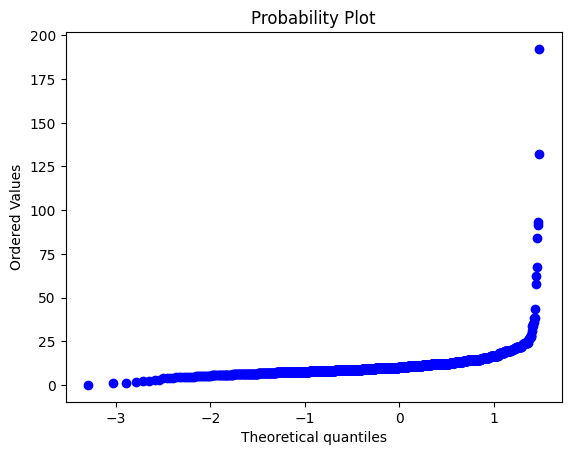

In [12]:
# sm.qqplot(data_cz_job['Salary'], line='45')
stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
# plt.hist(data_cz_job['Salary'])
plt.show()

In [13]:
## Using the IQR to eliminate outliers for Salary, Average_hours, and Effort:

Q1_salary = data_cz_job['Salary'].quantile(0.25)
Q3_salary = data_cz_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 3. * IQR_salary
upper_bound_salary = Q3_salary + 2.8 * IQR_salary

Q1_hrs = data_cz_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_cz_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 3. * IQR_hrs
upper_bound_hrs = Q3_hrs + 3. * IQR_hrs

Q1_effort = data_cz_job['Effort'].quantile(0.25)
Q3_effort = data_cz_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 3.  * IQR_effort
upper_bound_effort = Q3_effort + 3. * IQR_effort




data_cz_job = data_cz_job[(data_cz_job['Salary'] > lower_bound_salary) & (data_cz_job['Salary'] < upper_bound_salary) &
                          (data_cz_job['Actual_hrs'] > lower_bound_hrs) & (data_cz_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_cz_job['Effort'] > lower_bound_effort) & (data_cz_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_cz_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,1.0,...,4.0,5.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,1.0,...,5.0,5.0,2.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,NaN,10.0,2.0,...,2.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,2.0,...,2.0,2.0,4.0,5.0,1.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.0,13.0,5.0,...,2.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0,4.0
1097,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,5.0,...,2.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1098,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,4.0,...,3.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1099,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


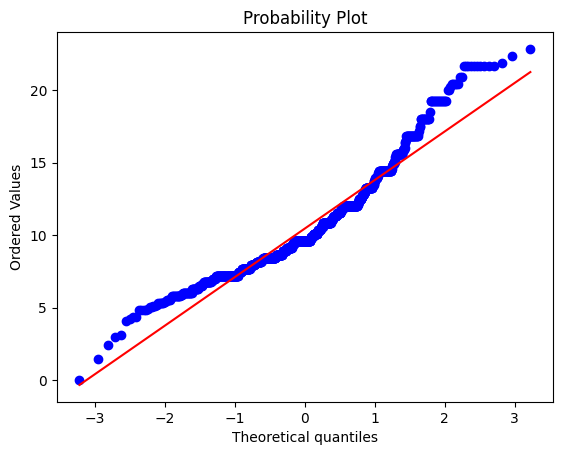

In [14]:
stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
# plt.hist(data_cz_job['Salary'])
plt.show()

In [15]:
data_cz_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,1.0,...,4.0,5.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,1.0,...,5.0,5.0,2.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,NaN,10.0,2.0,...,2.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,2.0,...,2.0,2.0,4.0,5.0,1.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.0,13.0,5.0,...,2.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0,4.0
1097,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,5.0,...,2.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1098,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,4.0,...,3.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1099,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


In [16]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 9.27594830896244
Interpolated Value: 9.25288552662735
Interpolated Value: 8.866213652178295
Interpolated Value: 10.320503281722468
Interpolated Value: 13.285430480395359
Interpolated Value: 15.270072994827201
Interpolated Value: 9.625678035638476
Interpolated Value: 13.59663499306892
Interpolated Value: 39.739208633093526
Interpolated Value: 37.68421052631579
Interpolated Value: 40.0958904109589
Interpolated Value: 42.169099756691
Interpolated Value: 45.74295774647887
Interpolated Value: 44.70454545454545
Interpolated Value: 39.555045871559635
Interpolated Value: 47.666666666666664
Interpolated Value: 104.29279790453351
Interpolated Value: 108.75
Interpolated Value: 116.44393118827654
Interpolated Value: 114.17152788411914
Interpolated Value: 116.34372410936206
Interpolated Value: 113.7784090909091
Interpolated Value: 111.80314715865174
Interpolated Value: 115.59523809523809
Interpolated Value: nan
Interpolated Value: 23.7027027027027
Interpolated Value: 20.31690140

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 3.317073170731707
Interpolated Value: 3.4507042253521125
Interpolated Value: 3.6818181818181817
Interpolated Value: 3.4311926605504586
Interpolated Value: 3.1666666666666665
Interpolated Value: 2.5035971223021583
Interpolated Value: 2.1578947368421053
Interpolated Value: 1.9452054794520548
Interpolated Value: 2.1246943765281174
Interpolated Value: 2.647887323943662
Interpolated Value: 3.0681818181818183
Interpolated Value: 2.4954128440366974
Interpolated Value: 2.6666666666666665


/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.000000,15.0,1.0,...,4.0,5.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.000000,10.0,1.0,...,5.0,5.0,2.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,2.507353,10.0,2.0,...,2.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.000000,2.5,2.0,...,2.0,2.0,4.0,5.0,1.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.000000,13.0,5.0,...,2.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.000000,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0,4.0
1097,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.000000,9.0,5.0,...,2.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1098,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.000000,8.0,4.0,...,3.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1099,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.000000,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


In [17]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         3.         3.05365854 3.29710145 4.
 5.        ]
Follow_commands : [1.         2.         2.70289855 2.94634146 3.         4.
 5.        ]
Before: Do_differently : [1.         2.         3.         3.36111111 3.68226601 4.
 5.        ]
Do_differently : [1.         2.         2.31773399 2.63888889 3.         4.
 5.        ]
Before: Forced_to_do : [1.         2.         2.95121951 3.         4.         5.        ]
Forced_to_do : [1.         2.         3.         3.04878049 4.         5.        ]


,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.000000,15.0,1.0,...,2.0,1.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.000000,10.0,1.0,...,1.0,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,2.507353,10.0,2.0,...,4.0,2.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.000000,2.5,2.0,...,4.0,4.0,4.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.000000,13.0,5.0,...,4.0,4.0,3.0,3.0,2.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.000000,2.0,1.0,...,2.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,4.0
1097,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.000000,9.0,5.0,...,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
1098,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.000000,8.0,4.0,...,3.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
1099,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.000000,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


In [18]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
# data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']].mean(axis=1)
# data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
# data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
#                                                              'Part_of_community']].mean(axis=1)
# data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Job_satisfaction']


In [19]:
data_cz_formatted

,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,2.2
1,33.0,3.0,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,2.4
2,30.0,3.0,8.213535,40.0,100.0,2.0,47.050683,23.525342,2.333333,3.833333,2.8
3,39.0,4.0,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,2.8
4,44.0,4.0,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,3.6
...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,2.6
1097,57.0,6.0,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,4.0
1098,40.0,4.0,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,4.0
1099,29.0,4.0,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,3.4


In [20]:
## Taking only academic seniority positions:

# data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]
data_cz_formatted_academic = data_cz_formatted[data_cz_formatted['Current_position'].isin([3., 4., 5., 6.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([3., 4., 5., 6.])

In [21]:
data_cz_formatted_academic.to_csv('data_cz_formatted_seniority.csv')
data_cz_formatted_academic

,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,2.2
1,33.0,3.0,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,2.4
2,30.0,3.0,8.213535,40.0,100.0,2.0,47.050683,23.525342,2.333333,3.833333,2.8
3,39.0,4.0,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,2.8
4,44.0,4.0,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,3.6
...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,2.6
1097,57.0,6.0,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,4.0
1098,40.0,4.0,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,4.0
1099,29.0,4.0,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,3.4


Text(0.5, 1.0, 'Czech Positions')

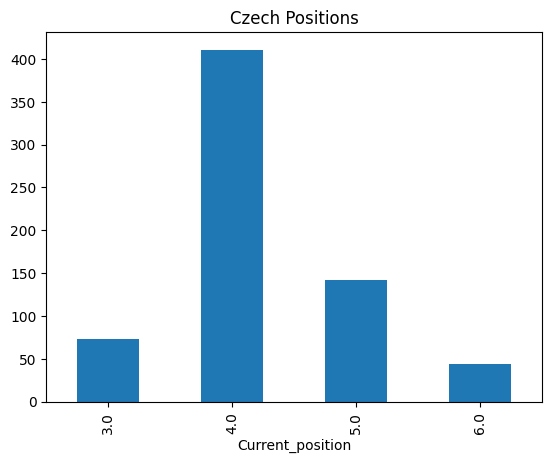

In [22]:
data_cz_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar')
plt.title('Czech Positions')

In [23]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic_w_dummies = pd.get_dummies(data_cz_formatted_academic, columns = ['Current_position'], drop_first=True) ## 'Contract_duration', 'Leadership_position'

# print(data_cz_formatted_academic_w_dummies[data_cz_formatted_academic_w_dummies.isna().any(axis=1)])

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.astype(float)

Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col]
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols]

## Calculating the interaction terms for Age moderator:
for col in Working_condition_cols:
  data_cz_formatted_academic_w_dummies[col+'_mod_Age'] = data_cz_formatted_academic_w_dummies[col] * data_cz_formatted_academic_w_dummies['Age']

# data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.drop(['Age_mod_Age', 'Job_satisfaction_mod_Age'], axis=1)

data_cz_formatted_academic_w_dummies.to_csv('data_cz_formatted_academic_w_dummies.csv')

print(data_cz_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_cz_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Job_satisfaction', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age']
(670, 21)


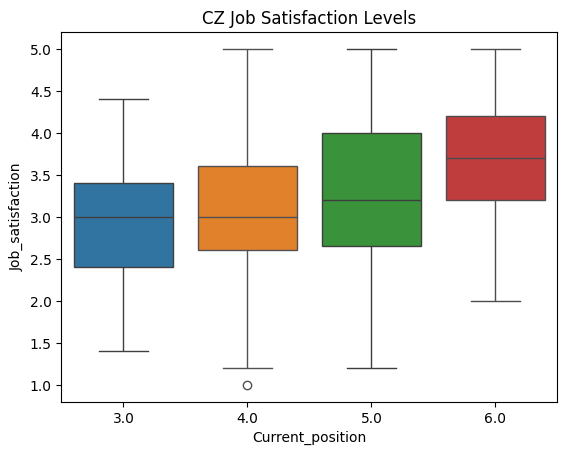

,Current Position,Job Satisfaction,Confidence Interval
0,3.0,2.887671,"[1.600, 4.240]"
1,4.0,3.033332,"[1.600, 4.600]"
2,5.0,3.273709,"[1.800, 4.800]"
3,6.0,3.704228,"[2.215, 4.800]"


In [38]:
satisfaction = pd.DataFrame()
pos = []
satis = []
pbci = []

plt.figure()
for value in np.sort(data_cz_formatted_academic['Current_position'].unique()):
  pos.append(value)
  data = data_cz_formatted_academic[data_cz_formatted_academic['Current_position']==value]
  satis.append(data['Job_satisfaction'].mean())
  lbound = np.percentile(data['Job_satisfaction'], 2.5)
  ubound = np.percentile(data['Job_satisfaction'], 97.5)
  pbci.append(f'[{lbound:.3f}, {ubound:.3f}]')
  sns.boxplot(x='Current_position', y = 'Job_satisfaction', data = data)
plt.title('CZ Job Satisfaction Levels')
plt.show()



satisfaction['Current Position'] = pos
satisfaction['Job Satisfaction'] = satis
satisfaction['Confidence Interval'] = pbci
satisfaction


## Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'CZ Correlation Heatmap')

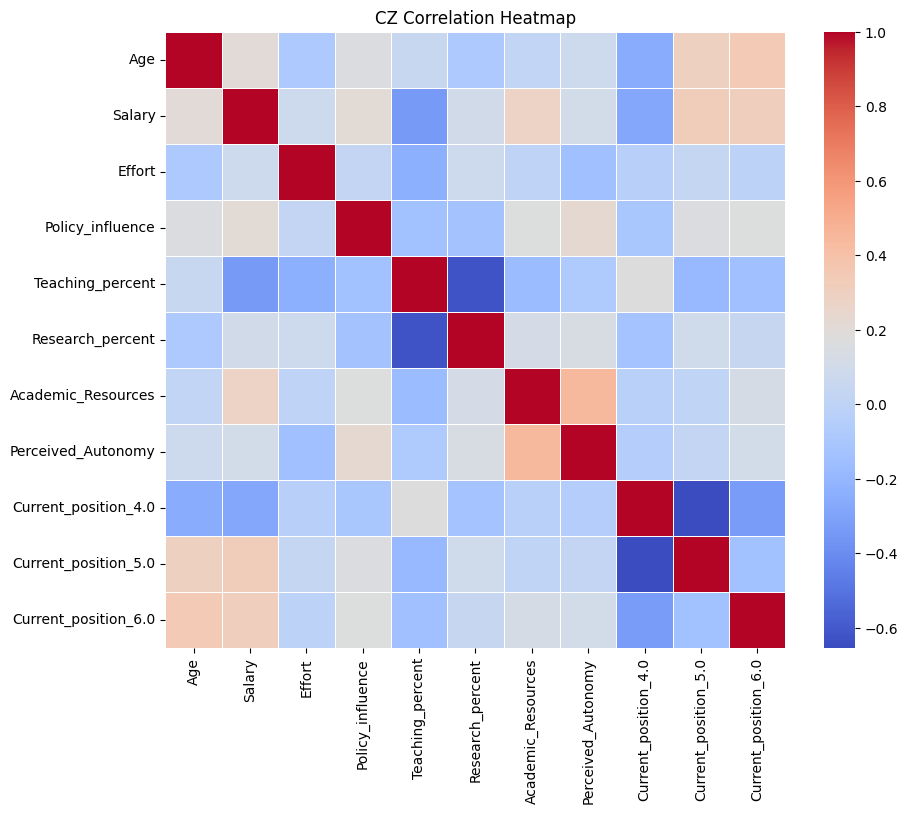

In [39]:
corr_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' not in col
             and 'Job_satisfaction' not in col and 'Actual_hrs' not in col]
correlations = data_cz_formatted_academic_w_dummies[corr_cols].corr()

plt.figure(figsize=(10, 8)) #, dpi = 600)
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CZ Correlation Heatmap')

In [40]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_cz_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  9.178082
1  Current_position_4.0  2.562993
2  Current_position_5.0  2.320998
3  Current_position_6.0  1.497485
----------------------------------------
Working Conditions:
             Variable         VIF
0               const  115.134245
1              Salary    1.262867
2          Actual_hrs    1.549086
3              Effort    1.467523
4    Policy_influence    1.235369
5    Teaching_percent    2.120420
6    Research_percent    1.877231
7  Academic_Resources    1.341238
8  Perceived_Autonomy    1.376727
----------------------------------------
Age-Moderated Working Conditions:
                     Variable        VIF
0                       const  18.258060
1              Salary_mod_Age   2.081859
2          Actual_hrs_mod_Age   2.309463
3              Effort_mod_Age   2.485428
4    Policy_influence_mod_Age   1.669561
5    Teaching_percent_mod_Age   1.533584
6    Research_percent_mod_Age   1.618427
7  Acade

## Calculating Cronbach's Alpha for the combined factors:

In [ ]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [ ]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(data_cz_job_w_inversion['Current_position'].isin([3., 4., 5., 6.]))].dropna() #&
                                                    #  (data_cz_job_w_inversion['Contract_duration']<5) &
                                                    #  (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

values = data_cz_for_alpha_academic['Teaching_hrs']/data_cz_for_alpha_academic[['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs']].sum(axis=1)
data_cz_for_alpha_academic = data_cz_for_alpha_academic.drop(values[values.isna()].index)

print(len(data_cz_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

# leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']])

# sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
# lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
# sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





670
Academic Resources Cronbach Alpha: 0.7846370080538884
Perceived Autonomy Cronbach Alpha: 0.8653308606107644
---------------------
Job Satisfaction Cronbach Alpha: 0.780772795950254


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [ ]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age', 'Actual_hrs']
Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
# Working_condition_cols = ['Salary', 'Effort', 'Teaching_percent', 'Research_percent', 'Academic_Resources',
#                           'Perceived_Autonomy', 'Policy_influence']
# Moderation_cols = [col+'_mod_Age' for col in Working_condition_cols] #
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col and 'Actual_hrs' not in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' not in col and
                          col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Effort',
 'Policy_influence',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy']

In [ ]:
Current_position_dummy_cols

['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']

In [ ]:
Moderation_cols

['Salary_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age']

In [ ]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

# path_no_mod = f"""
# Salary ~ {Current_position_factors}
# Actual_hrs ~ {Current_position_factors}
# Effort ~ {Current_position_factors}
# Policy_influence ~ {Current_position_factors}
# Teaching_percent ~ {Current_position_factors}
# Research_percent ~ {Current_position_factors}
# Academic_Resources ~ {Current_position_factors}
# Perceived_Autonomy ~ {Current_position_factors}
# Leadership_quality ~ {Current_position_factors}
# Sense_of_community ~ {Current_position_factors}
# Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
# """

## Performance_pressure ~ {Current_position_factors}

# 'Salary', 'Effort', 'Teaching_percent', 'Research_percent', 'Academic_Resources',
#                           'Perceived_Autonomy', 'Policy_influence'

path_no_mod = f"""
Salary ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
"""

path = f"""
Salary ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""



# path = f"""
# Salary ~ {Current_position_factors}
# Actual_hrs ~ {Current_position_factors}
# Effort ~ {Current_position_factors}
# Policy_influence ~ {Current_position_factors}
# Teaching_percent ~ {Current_position_factors}
# Research_percent ~ {Current_position_factors}
# Academic_Resources ~ {Current_position_factors}
# Perceived_Autonomy ~ {Current_position_factors}
# Leadership_quality ~ {Current_position_factors}
# Sense_of_community ~ {Current_position_factors}
# Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
# """

# Contract_duration_2.0 ~ {Current_position_factors}
# Contract_duration_3.0 ~ {Current_position_factors}
# Leadership_position_2.0 ~ {Current_position_factors}
# Leadership_position_3.0 ~ {Current_position_factors}

print('Mediation/Moderation Path Model Specification:')
print(path)
print('-----------------------------------')


Mediation/Moderation Path Model Specification:

Salary ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Effort ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Teaching_percent ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Research_percent ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Academic_Resources ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Perceived_Autonomy ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Policy_influence ~ Current_position_4.0 + Current_position_5.0 + Current_position_6.0
Job_satisfaction ~ Salary + Effort + Policy_influence + Teaching_percent + Research_percent + Academic_Resources + Perceived_Autonomy + Current_position_4.0 + Current_position_5.0 + Current_position_6.0 + Salary_mod_Age + Effort_mod_Age + Policy_influence_mod_Age + Teaching_percent_mod_Age + Research_percent_mod_Age + Academic_Resources_mod_Age + Perceived_Autonom

In [ ]:
model = semopy.Model(path)
result = model.fit(data_cz_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 19.588
Number of iterations: 187
Params: 1.454 4.419 6.404 -0.283 2.090 0.613 -2.223 -12.184 -16.301 -2.920 1.794 1.819 0.114 0.148 0.471 0.076 0.156 0.441 0.474 0.937 1.336 0.078 0.004 -0.122 -0.007 -0.003 0.452 0.261 -0.059 -0.048 -0.032 -0.001 -0.000 0.004 0.000 0.000 0.002 0.000 0.536 515.158 0.253 0.720 1.339 274.913 9.297 391.656


In [ ]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF              125.000000
DoF Baseline     163.000000
chi2           13123.885275
chi2 p-value       0.000000
chi2 Baseline  16949.300091
CFI                0.225625
GFI                0.225698
AGFI              -0.009690
NFI                0.225698
TLI               -0.009785
RMSEA              0.394262
AIC               52.824223
BIC              260.158998
LogLik            19.587888
-------------------------


In [ ]:
ins = model.inspect()
print(ins)
ins.to_csv('CZ_Model_Parameter_Values.csv')

                  lval  op                        rval    Estimate   Std. Err  \
0               Salary   ~        Current_position_4.0    1.454360   0.387258   
1               Salary   ~        Current_position_5.0    4.419233   0.439111   
2               Salary   ~        Current_position_6.0    6.403818   0.581923   
3               Effort   ~        Current_position_4.0   -0.283105   2.882774   
4               Effort   ~        Current_position_5.0    2.090024   3.268766   
5               Effort   ~        Current_position_6.0    0.612863   4.331870   
6     Teaching_percent   ~        Current_position_4.0   -2.222792   2.513580   
7     Teaching_percent   ~        Current_position_5.0  -12.184055   2.850139   
8     Teaching_percent   ~        Current_position_6.0  -16.301255   3.777092   
9     Research_percent   ~        Current_position_4.0   -2.920047   2.105901   
10    Research_percent   ~        Current_position_5.0    1.794047   2.387873   
11    Research_percent   ~  

In [ ]:
print(ins[ins['p-value']<0.05])

                  lval  op                        rval    Estimate   Std. Err  \
0               Salary   ~        Current_position_4.0    1.454360   0.387258   
1               Salary   ~        Current_position_5.0    4.419233   0.439111   
2               Salary   ~        Current_position_6.0    6.403818   0.581923   
7     Teaching_percent   ~        Current_position_5.0  -12.184055   2.850139   
8     Teaching_percent   ~        Current_position_6.0  -16.301255   3.777092   
14  Academic_Resources   ~        Current_position_6.0    0.471239   0.139732   
17  Perceived_Autonomy   ~        Current_position_6.0    0.441142   0.161949   
18    Policy_influence   ~        Current_position_4.0    0.473799   0.146975   
19    Policy_influence   ~        Current_position_5.0    0.937138   0.166654   
20    Policy_influence   ~        Current_position_6.0    1.336224   0.220856   
21    Job_satisfaction   ~                      Salary    0.078481   0.006367   
22    Job_satisfaction   ~  

In [ ]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Salary,~,Current_position_4.0,1.454360,0.387258,3.755531,1.729746e-04,***,1.45436***
1,Salary,~,Current_position_5.0,4.419233,0.439111,10.064055,0.000000e+00,***,4.41923***
2,Salary,~,Current_position_6.0,6.403818,0.581923,11.004582,0.000000e+00,***,6.40382***
3,Effort,~,Current_position_4.0,-0.283105,2.882774,-0.098206,9.217690e-01,(n.s.),-0.2831 (n.s.)
4,Effort,~,Current_position_5.0,2.090024,3.268766,0.639392,5.225678e-01,(n.s.),2.09002 (n.s.)
5,Effort,~,Current_position_6.0,0.612863,4.331870,0.141478,8.874925e-01,(n.s.),0.61286 (n.s.)
6,Teaching_percent,~,Current_position_4.0,-2.222792,2.513580,-0.884313,3.765273e-01,(n.s.),-2.22279 (n.s.)
7,Teaching_percent,~,Current_position_5.0,-12.184055,2.850139,-4.274898,1.912247e-05,***,-12.18405***
8,Teaching_percent,~,Current_position_6.0,-16.301255,3.777092,-4.315821,1.590107e-05,***,-16.30125***
9,Research_percent,~,Current_position_4.0,-2.920047,2.105901,-1.386602,1.655631e-01,(n.s.),-2.92005 (n.s.)


In [ ]:

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths.set_index('lval')



,Current_position_4.0,Current_position_5.0,Current_position_6.0
lval,,,
Salary,1.45436***,4.41923***,6.40382***
Effort,-0.2831 (n.s.),2.09002 (n.s.),0.61286 (n.s.)
Teaching_percent,-2.22279 (n.s.),-12.18405***,-16.30125***
Research_percent,-2.92005 (n.s.),1.79405 (n.s.),1.81897 (n.s.)
Academic_Resources,0.11362 (n.s.),0.14805 (n.s.),0.47124***
Perceived_Autonomy,0.07626 (n.s.),0.15591 (n.s.),0.44114**
Policy_influence,0.4738**,0.93714***,1.33622***
Job_satisfaction,-0.05932 (n.s.),-0.04822 (n.s.),-0.03158 (n.s.)


In [ ]:
work_cond_paths.set_index('lval').T

lval,Job_satisfaction
Salary,0.07848***
Effort,0.00387***
Policy_influence,-0.12219***
Teaching_percent,-0.00663***
Research_percent,-0.00308**
Academic_Resources,0.45165***
Perceived_Autonomy,0.26094***


In [ ]:
mod_age_paths.set_index('lval').T

lval,Job_satisfaction
Salary_mod_Age,-0.00073***
Effort_mod_Age,-0.0001***
Policy_influence_mod_Age,0.00393***
Teaching_percent_mod_Age,0.00014***
Research_percent_mod_Age,3e-05 (n.s.)
Academic_Resources_mod_Age,0.00206**
Perceived_Autonomy_mod_Age,0.00019 (n.s.)


In [ ]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                      (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                       (ins['lval']=='Job_satisfaction')].iloc[0]))
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_4.0,0.114139,-0.001096,-0.057892,0.014745,0.008996,0.051318,0.019899
1,Current_position_5.0,0.346824,0.008094,-0.114506,0.080825,-0.005527,0.066867,0.040682
2,Current_position_6.0,0.502576,0.002373,-0.163269,0.108137,-0.005604,0.212836,0.115112


## Performing Sobel Test for mediation effects:

In [ ]:
Sobel_z_stat_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z
  Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p

Sobel_z_stat_df


,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_4.0,3.5925***,-0.0982 (n.s.),-2.9478**,0.8768 (n.s.),1.2267 (n.s.),1.2188 (n.s.),0.7062 (n.s.)
1,Current_position_5.0,7.7955***,0.6331 (n.s.),-4.4509***,3.6134***,-0.7224 (n.s.),1.3994 (n.s.),1.2679 (n.s.)
2,Current_position_6.0,8.2089***,0.1414 (n.s.),-4.6539***,3.638***,-0.5616 (n.s.),3.3082***,2.6494**


In [ ]:
Sobel_z_stat_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,3.5925***,7.7955***,8.2089***
Effort,-0.0982 (n.s.),0.6331 (n.s.),0.1414 (n.s.)
Policy_influence,-2.9478**,-4.4509***,-4.6539***
Teaching_percent,0.8768 (n.s.),3.6134***,3.638***
Research_percent,1.2267 (n.s.),-0.7224 (n.s.),-0.5616 (n.s.)
Academic_Resources,1.2188 (n.s.),1.3994 (n.s.),3.3082***
Perceived_Autonomy,0.7062 (n.s.),1.2679 (n.s.),2.6494**


In [ ]:
Sobel_p_val_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000328,6.415741e-15,2.233104e-16
Effort,0.921787,5.266617e-01,8.875470e-01
Policy_influence,0.003200,8.550048e-06,3.257810e-06
Teaching_percent,0.380570,3.022029e-04,2.747453e-04
Research_percent,0.219947,4.700259e-01,5.744146e-01
Academic_Resources,0.222933,1.617012e-01,9.389280e-04
Perceived_Autonomy,0.480056,2.048424e-01,8.062443e-03


## Sobel test for moderation effects:

In [ ]:
Sobel_z_mod_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_mod_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_mod_df.loc[len(Sobel_z_mod_df)] = Sobel_z
  Sobel_p_mod_df.loc[len(Sobel_p_mod_df)] = Sobel_p

Sobel_z_mod_df

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_4.0,-3.0062**,0.0982 (n.s.),3.0761**,-0.8753 (n.s.),-0.7438 (n.s.),1.1394 (n.s.),0.301 (n.s.)
1,Current_position_5.0,-4.4891***,-0.6357 (n.s.),4.9337***,-3.5111***,0.5718 (n.s.),1.2827 (n.s.),0.3219 (n.s.)
2,Current_position_6.0,-4.564***,-0.1414 (n.s.),5.2146***,-3.5337***,0.4815 (n.s.),2.3035*,0.3302 (n.s.)


In [ ]:
Sobel_z_mod_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,-3.0062**,-4.4891***,-4.564***
Effort,0.0982 (n.s.),-0.6357 (n.s.),-0.1414 (n.s.)
Policy_influence,3.0761**,4.9337***,5.2146***
Teaching_percent,-0.8753 (n.s.),-3.5111***,-3.5337***
Research_percent,-0.7438 (n.s.),0.5718 (n.s.),0.4815 (n.s.)
Academic_Resources,1.1394 (n.s.),1.2827 (n.s.),2.3035*
Perceived_Autonomy,0.301 (n.s.),0.3219 (n.s.),0.3302 (n.s.)


In [ ]:
Sobel_p_mod_df.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.002645,7.152166e-06,5.018388e-06
Effort,0.921780,5.249700e-01,8.875244e-01
Policy_influence,0.002098,8.068127e-07,1.842460e-07
Teaching_percent,0.381397,4.462364e-04,4.098170e-04
Research_percent,0.456979,5.674770e-01,6.301848e-01
Academic_Resources,0.254547,1.995848e-01,2.125060e-02
Perceived_Autonomy,0.763384,7.475387e-01,7.412524e-01


## Path Modelling (No Moderation):

In [ ]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_cz_formatted_academic_w_dummies)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.125
Number of iterations: 175
Params: 1.454 4.419 6.404 -0.271 2.099 0.637 -2.222 -12.182 -16.304 -2.929 1.785 1.809 0.114 0.148 0.471 0.076 0.156 0.441 0.474 0.937 1.336 0.045 -0.001 0.055 -0.000 -0.002 0.540 0.274 -0.037 0.013 0.077 0.536 515.028 0.259 0.720 1.339 274.933 9.297 391.595


In [ ]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF              27.000000
DoF Baseline     58.000000
chi2            753.837388
chi2 p-value      0.000000
chi2 Baseline  2336.709008
CFI               0.681031
GFI               0.677394
AGFI              0.306994
NFI               0.677394
TLI               0.314807
RMSEA             0.200597
AIC              75.749739
BIC             251.533570
LogLik            1.125130
-------------------------


In [ ]:
ins_no_mod = model_no_mod.inspect()
print(ins_no_mod)
ins_no_mod.to_csv('CZ_No_Mod_Model_Parameter_Values.csv')

                  lval  op                  rval    Estimate   Std. Err  \
0               Salary   ~  Current_position_4.0    1.454257   0.387259   
1               Salary   ~  Current_position_5.0    4.419169   0.439112   
2               Salary   ~  Current_position_6.0    6.403767   0.581924   
3               Effort   ~  Current_position_4.0   -0.271027   2.882409   
4               Effort   ~  Current_position_5.0    2.099005   3.268352   
5               Effort   ~  Current_position_6.0    0.636920   4.331321   
6     Teaching_percent   ~  Current_position_4.0   -2.221649   2.513386   
7     Teaching_percent   ~  Current_position_5.0  -12.181841   2.849919   
8     Teaching_percent   ~  Current_position_6.0  -16.304314   3.776800   
9     Research_percent   ~  Current_position_4.0   -2.928642   2.105976   
10    Research_percent   ~  Current_position_5.0    1.784886   2.387958   
11    Research_percent   ~  Current_position_6.0    1.809468   3.164596   
12  Academic_Resources   

## Sobel Test for Mediation Effect (No Moderation)

In [ ]:
Sobel_z_stat_no_mod  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_no_mod  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) & (ins_no_mod['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==curr_pos) & (ins_no_mod['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z
  Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p

Sobel_z_stat_no_mod

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_4.0,3.3051***,0.0933 (n.s.),2.2862*,0.1142 (n.s.),1.0359 (n.s.),1.2196 (n.s.),0.7063 (n.s.)
1,Current_position_5.0,5.7254***,-0.4933 (n.s.),2.809**,0.1152 (n.s.),-0.6735 (n.s.),1.4006 (n.s.),1.2684 (n.s.)
2,Current_position_6.0,5.8833***,-0.1444 (n.s.),2.858**,0.1152 (n.s.),-0.5366 (n.s.),3.3262***,2.6542**


In [ ]:
Sobel_z_stat_no_mod.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,3.3051***,5.7254***,5.8833***
Effort,0.0933 (n.s.),-0.4933 (n.s.),-0.1444 (n.s.)
Policy_influence,2.2862*,2.809**,2.858**
Teaching_percent,0.1142 (n.s.),0.1152 (n.s.),0.1152 (n.s.)
Research_percent,1.0359 (n.s.),-0.6735 (n.s.),-0.5366 (n.s.)
Academic_Resources,1.2196 (n.s.),1.4006 (n.s.),3.3262***
Perceived_Autonomy,0.7063 (n.s.),1.2684 (n.s.),2.6542**


In [ ]:
Sobel_p_val_no_mod.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000949,1.031895e-08,4.021206e-09
Effort,0.925637,6.217841e-01,8.851508e-01
Policy_influence,0.022245,4.969611e-03,4.263528e-03
Teaching_percent,0.909045,9.083124e-01,9.083117e-01
Research_percent,0.300238,5.006379e-01,5.915696e-01
Academic_Resources,0.222619,1.613315e-01,8.805016e-04
Perceived_Autonomy,0.480000,2.046407e-01,7.949743e-03


## Bootstrapping:

In [ ]:
times = 2000

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


mediation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)
mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 20 ==0:
    print(f'Run: {i}/{times}')
  data_cz_bootstrapped = data_cz_formatted_academic_w_dummies.sample(n=len(data_cz_formatted_academic_w_dummies), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_cz_bootstrapped)
  ins = model.inspect()
  # model_no_mod = semopy.Model(path_no_mod)
  result_no_mod = model_no_mod.fit(data_cz_bootstrapped)
  ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff = [i, curr_pos]
      mod_coeff = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
        mod_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff = path_coeff + fit_evaluation.iloc[0].tolist()
      mediation_path_values.loc[len(mediation_path_values)] = path_coeff
      moderation_path_values.loc[len(moderation_path_values)] = mod_coeff


    ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff_no_mod = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']==work_cond)].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod = path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
      mediation_path_values_no_mod.loc[len(mediation_path_values_no_mod)] = path_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

mediation_path_values

Run: 0/2000
Run: 20/2000
Run: 40/2000
Run: 60/2000
Run: 80/2000
Run: 100/2000
Run: 120/2000
Run: 140/2000
Run: 160/2000
Run: 180/2000
Run: 200/2000
Run: 220/2000
Run: 240/2000
Run: 260/2000
Run: 280/2000
Run: 300/2000
Run: 320/2000
Run: 340/2000
Run: 360/2000
Run: 380/2000
Run: 400/2000
Run: 420/2000
Run: 440/2000
Run: 460/2000
Run: 480/2000
Run: 500/2000
Run: 520/2000
Run: 540/2000
Run: 560/2000
Run: 580/2000
Run: 600/2000
Run: 620/2000
Run: 640/2000
Run: 660/2000
Run: 680/2000
Run: 700/2000
Run: 720/2000
Run: 740/2000
Run: 760/2000
Run: 780/2000
Run: 800/2000
Run: 820/2000
Run: 840/2000
Run: 860/2000
Run: 880/2000
Run: 900/2000
Run: 920/2000
Run: 940/2000
Run: 960/2000
Run: 980/2000
Run: 1000/2000
Run: 1020/2000
Run: 1040/2000
Run: 1060/2000
Run: 1080/2000
Run: 1100/2000
Run: 1120/2000
Run: 1140/2000
Run: 1160/2000
Run: 1180/2000
Run: 1200/2000
Run: 1220/2000
Run: 1240/2000
Run: 1260/2000
Run: 1280/2000
Run: 1300/2000
Run: 1320/2000
Run: 1340/2000
Run: 1360/2000
Run: 1380/2000
Run: 1

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.061172,-0.006390,-0.082758,0.048390,0.056843,0.082426,0.009125,0.003048,...,17532.411470,0.237296,0.237258,0.005384,0.237258,0.005435,0.398018,52.081460,259.416235,19.959270
1,0,Current_position_5.0,0.173455,0.014567,-0.151183,0.152323,0.023332,0.130099,0.045263,0.098389,...,17532.411470,0.237296,0.237258,0.005384,0.237258,0.005435,0.398018,52.081460,259.416235,19.959270
2,0,Current_position_6.0,0.259501,-0.021817,-0.174302,0.156120,0.019398,0.303390,0.127436,-0.031579,...,17532.411470,0.237296,0.237258,0.005384,0.237258,0.005435,0.398018,52.081460,259.416235,19.959270
3,1,Current_position_4.0,0.127509,-0.007579,-0.061784,-0.052194,0.078536,0.004443,0.049257,-0.087583,...,17422.606393,0.237226,0.237187,0.005292,0.237187,0.005342,0.396776,52.327807,259.662582,19.836097
4,1,Current_position_5.0,0.325036,-0.006779,-0.126858,0.045576,0.034854,0.025874,0.076657,-0.058918,...,17422.606393,0.237226,0.237187,0.005292,0.237187,0.005342,0.396776,52.327807,259.662582,19.836097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,0.159523,-0.094148,-0.164575,0.042803,0.029238,0.148494,0.124363,0.013715,...,17112.698818,0.210058,0.210277,-0.029798,0.210277,-0.030085,0.400139,51.658848,258.993623,20.170576
5996,1998,Current_position_6.0,0.266627,-0.099112,-0.235246,0.121038,0.046331,0.311613,0.180789,-0.079126,...,17112.698818,0.210058,0.210277,-0.029798,0.210277,-0.030085,0.400139,51.658848,258.993623,20.170576
5997,1999,Current_position_4.0,0.145482,0.001881,-0.053059,-0.010917,0.077279,0.012640,0.019476,-0.184069,...,17248.702002,0.207188,0.207433,-0.033507,0.207433,-0.033826,0.402470,51.191810,258.526585,20.404095
5998,1999,Current_position_5.0,0.536448,0.003352,-0.141604,0.042244,0.041772,0.039686,0.051008,-0.227483,...,17248.702002,0.207188,0.207433,-0.033507,0.207433,-0.033826,0.402470,51.191810,258.526585,20.404095


(array([1.00e+00, 4.00e+00, 8.00e+00, 4.80e+01, 5.11e+02, 1.30e+03,
        8.21e+02, 6.15e+02, 6.61e+02, 6.28e+02, 4.75e+02, 3.91e+02,
        2.27e+02, 1.46e+02, 8.60e+01, 4.10e+01, 2.00e+01, 1.00e+01,
        5.00e+00, 2.00e+00]),
 array([-0.34078051, -0.25926348, -0.17774645, -0.09622942, -0.01471239,
         0.06680464,  0.14832167,  0.22983869,  0.31135572,  0.39287275,
         0.47438978,  0.55590681,  0.63742384,  0.71894087,  0.8004579 ,
         0.88197493,  0.96349196,  1.04500899,  1.12652602,  1.20804305,
         1.28956008]),
 <BarContainer object of 20 artists>)

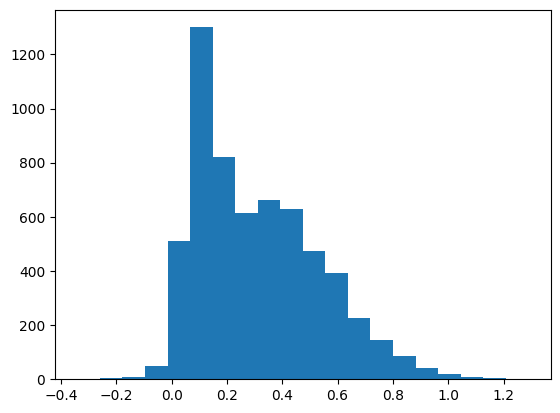

In [ ]:
plt.hist(mediation_path_values.iloc[:,2], bins=20)

In [ ]:
moderation_path_values

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,0,Current_position_4.0,-0.000089,0.000151,0.002601,-0.000965,-0.000976,-0.000142,0.000065
1,0,Current_position_5.0,-0.000253,-0.000345,0.004752,-0.003037,-0.000401,-0.000225,0.000324
2,0,Current_position_6.0,-0.000379,0.000516,0.005479,-0.003113,-0.000333,-0.000524,0.000913
3,1,Current_position_4.0,-0.000517,0.000188,0.001813,0.000956,-0.001527,0.000012,-0.000194
4,1,Current_position_5.0,-0.001319,0.000169,0.003722,-0.000835,-0.000678,0.000071,-0.000302
...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,-0.000651,0.002184,0.004764,-0.000743,-0.000578,0.000721,-0.000696
5996,1998,Current_position_6.0,-0.001089,0.002300,0.006810,-0.002102,-0.000915,0.001514,-0.001012
5997,1999,Current_position_4.0,-0.002086,-0.000064,0.001438,0.000191,-0.001499,0.000153,0.000018
5998,1999,Current_position_5.0,-0.007693,-0.000114,0.003839,-0.000740,-0.000810,0.000481,0.000047


In [ ]:
mediation_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.054420,0.000503,0.038274,0.005368,0.013192,0.076684,0.011859,0.014531,...,2579.539494,0.685702,0.682302,0.317538,0.682302,0.324842,0.209464,75.553688,251.337518,1.223156
1,0,Current_position_5.0,0.154311,-0.001149,0.069921,0.016888,0.005407,0.121025,0.058826,0.138099,...,2579.539494,0.685702,0.682302,0.317538,0.682302,0.324842,0.209464,75.553688,251.337518,1.223156
2,0,Current_position_6.0,0.230860,0.001718,0.080610,0.017325,0.004493,0.282235,0.165647,0.120054,...,2579.539494,0.685702,0.682302,0.317538,0.682302,0.324842,0.209464,75.553688,251.337518,1.223156
3,1,Current_position_4.0,0.098426,0.001255,0.019472,-0.007838,0.011669,0.004941,0.041646,-0.041063,...,2582.032413,0.709314,0.705387,0.367127,0.705387,0.375563,0.201542,75.729250,251.513081,1.135375
4,1,Current_position_5.0,0.250906,0.001114,0.040005,0.006843,0.005191,0.028726,0.064815,0.073028,...,2582.032413,0.709314,0.705387,0.367127,0.705387,0.375563,0.201542,75.729250,251.513081,1.135375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,0.126540,0.003468,0.050818,0.007931,0.002271,0.174283,0.099903,0.103684,...,2391.888093,0.660011,0.656967,0.263115,0.656967,0.269653,0.209593,75.550758,251.334589,1.224621
5996,1998,Current_position_6.0,0.211501,0.003264,0.072644,0.021732,0.004405,0.365726,0.145226,0.088420,...,2391.888093,0.660011,0.656967,0.263115,0.656967,0.269653,0.209593,75.550758,251.334589,1.224621
5997,1999,Current_position_4.0,0.058133,-0.001489,0.010944,0.000192,0.013323,0.019364,0.021429,-0.110118,...,2314.285645,0.669933,0.666539,0.283675,0.666539,0.290968,0.203050,75.696343,251.480174,1.151828
5998,1999,Current_position_5.0,0.214385,-0.002470,0.029205,-0.000777,0.007333,0.060772,0.056131,-0.109614,...,2314.285645,0.669933,0.666539,0.283675,0.666539,0.290968,0.203050,75.696343,251.480174,1.151828


In [ ]:
mediation_path_values.to_csv('CZ_mediation_path_values.csv')
moderation_path_values.to_csv('CZ_moderation_path_values.csv')
mediation_path_values_no_mod.to_csv('CZ_mediation_path_values_no_mod.csv')

## Bootstrap Results Analysis:

In [ ]:
path_to_bootstrap = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/CZ_bootstrap/'

mediation_path_values = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values.csv', sep=",", header=0).iloc[:,1:]
moderation_path_values = pd.read_csv(path_to_bootstrap+'CZ_moderation_path_values.csv', sep=",", header=0).iloc[:,1:]
mediation_path_values_no_mod = pd.read_csv(path_to_bootstrap+'CZ_mediation_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]


In [ ]:
mediation_path_values

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.061172,-0.006390,-0.082758,0.048390,0.056843,0.082426,0.009125,0.003048,...,17532.411470,0.237296,0.237258,0.005384,0.237258,0.005435,0.398018,52.081460,259.416235,19.959270
1,0,Current_position_5.0,0.173455,0.014567,-0.151183,0.152323,0.023332,0.130099,0.045263,0.098389,...,17532.411470,0.237296,0.237258,0.005384,0.237258,0.005435,0.398018,52.081460,259.416235,19.959270
2,0,Current_position_6.0,0.259501,-0.021817,-0.174302,0.156120,0.019398,0.303390,0.127436,-0.031579,...,17532.411470,0.237296,0.237258,0.005384,0.237258,0.005435,0.398018,52.081460,259.416235,19.959270
3,1,Current_position_4.0,0.127509,-0.007579,-0.061784,-0.052194,0.078536,0.004443,0.049257,-0.087583,...,17422.606393,0.237226,0.237187,0.005292,0.237187,0.005342,0.396776,52.327807,259.662582,19.836097
4,1,Current_position_5.0,0.325036,-0.006779,-0.126858,0.045576,0.034854,0.025874,0.076657,-0.058918,...,17422.606393,0.237226,0.237187,0.005292,0.237187,0.005342,0.396776,52.327807,259.662582,19.836097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,0.159523,-0.094148,-0.164575,0.042803,0.029238,0.148494,0.124363,0.013715,...,17112.698818,0.210058,0.210277,-0.029798,0.210277,-0.030085,0.400139,51.658848,258.993623,20.170576
5996,1998,Current_position_6.0,0.266627,-0.099112,-0.235246,0.121038,0.046331,0.311613,0.180789,-0.079126,...,17112.698818,0.210058,0.210277,-0.029798,0.210277,-0.030085,0.400139,51.658848,258.993623,20.170576
5997,1999,Current_position_4.0,0.145482,0.001881,-0.053059,-0.010917,0.077279,0.012640,0.019476,-0.184069,...,17248.702002,0.207188,0.207433,-0.033507,0.207433,-0.033826,0.402470,51.191810,258.526585,20.404095
5998,1999,Current_position_5.0,0.536448,0.003352,-0.141604,0.042244,0.041772,0.039686,0.051008,-0.227483,...,17248.702002,0.207188,0.207433,-0.033507,0.207433,-0.033826,0.402470,51.191810,258.526585,20.404095


In [ ]:
moderation_path_values

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,0,Current_position_4.0,-0.000089,0.000151,0.002601,-0.000965,-0.000976,-0.000142,0.000065
1,0,Current_position_5.0,-0.000253,-0.000345,0.004752,-0.003037,-0.000401,-0.000225,0.000324
2,0,Current_position_6.0,-0.000379,0.000516,0.005479,-0.003113,-0.000333,-0.000524,0.000913
3,1,Current_position_4.0,-0.000517,0.000188,0.001813,0.000956,-0.001527,0.000012,-0.000194
4,1,Current_position_5.0,-0.001319,0.000169,0.003722,-0.000835,-0.000678,0.000071,-0.000302
...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,-0.000651,0.002184,0.004764,-0.000743,-0.000578,0.000721,-0.000696
5996,1998,Current_position_6.0,-0.001089,0.002300,0.006810,-0.002102,-0.000915,0.001514,-0.001012
5997,1999,Current_position_4.0,-0.002086,-0.000064,0.001438,0.000191,-0.001499,0.000153,0.000018
5998,1999,Current_position_5.0,-0.007693,-0.000114,0.003839,-0.000740,-0.000810,0.000481,0.000047


In [ ]:
mediation_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_4.0,0.054420,0.000503,0.038274,0.005368,0.013192,0.076684,0.011859,0.014531,...,2579.539494,0.685702,0.682302,0.317538,0.682302,0.324842,0.209464,75.553688,251.337518,1.223156
1,0,Current_position_5.0,0.154311,-0.001149,0.069921,0.016888,0.005407,0.121025,0.058826,0.138099,...,2579.539494,0.685702,0.682302,0.317538,0.682302,0.324842,0.209464,75.553688,251.337518,1.223156
2,0,Current_position_6.0,0.230860,0.001718,0.080610,0.017325,0.004493,0.282235,0.165647,0.120054,...,2579.539494,0.685702,0.682302,0.317538,0.682302,0.324842,0.209464,75.553688,251.337518,1.223156
3,1,Current_position_4.0,0.098426,0.001255,0.019472,-0.007838,0.011669,0.004941,0.041646,-0.041063,...,2582.032413,0.709314,0.705387,0.367127,0.705387,0.375563,0.201542,75.729250,251.513081,1.135375
4,1,Current_position_5.0,0.250906,0.001114,0.040005,0.006843,0.005191,0.028726,0.064815,0.073028,...,2582.032413,0.709314,0.705387,0.367127,0.705387,0.375563,0.201542,75.729250,251.513081,1.135375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Current_position_5.0,0.126540,0.003468,0.050818,0.007931,0.002271,0.174283,0.099903,0.103684,...,2391.888093,0.660011,0.656967,0.263115,0.656967,0.269653,0.209593,75.550758,251.334589,1.224621
5996,1998,Current_position_6.0,0.211501,0.003264,0.072644,0.021732,0.004405,0.365726,0.145226,0.088420,...,2391.888093,0.660011,0.656967,0.263115,0.656967,0.269653,0.209593,75.550758,251.334589,1.224621
5997,1999,Current_position_4.0,0.058133,-0.001489,0.010944,0.000192,0.013323,0.019364,0.021429,-0.110118,...,2314.285645,0.669933,0.666539,0.283675,0.666539,0.290968,0.203050,75.696343,251.480174,1.151828
5998,1999,Current_position_5.0,0.214385,-0.002470,0.029205,-0.000777,0.007333,0.060772,0.056131,-0.109614,...,2314.285645,0.669933,0.666539,0.283675,0.666539,0.290968,0.203050,75.696343,251.480174,1.151828


##Analyzing the bootstrap results for mediation effect:

In [ ]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_90_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = mediation_path_values[mediation_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]
  pbci_90_vals = [curr_pos]

  for col in data[Working_condition_cols+['Job_satisfaction']]:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    if lbound > 0. or ubound < 0.:
      sig = ' *'
    else:
      sig = ''
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']'+sig)
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results


,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_4.0,0.110303,-0.009059,-0.054898,0.015142,0.012359,0.051591,0.018200,-0.059195
1,Current_position_5.0,0.336693,-0.000601,-0.109115,0.082465,-0.001049,0.067256,0.037439,-0.049169
2,Current_position_6.0,0.486472,-0.010177,-0.155297,0.108066,0.000174,0.217124,0.108939,-0.032992


In [ ]:
lbound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_4.0,0.010690,-0.049030,-0.156661,-0.031722,-0.040314,-0.037204,-0.044803,-0.217699
1,Current_position_5.0,0.033657,-0.034469,-0.288355,-0.030697,-0.047095,-0.031106,-0.033307,-0.252495
2,Current_position_6.0,0.046857,-0.065855,-0.416555,-0.043485,-0.047838,0.064590,-0.017752,-0.281301


In [ ]:
ubound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_4.0,0.228254,0.014581,0.026243,0.085952,0.084073,0.148787,0.090632,0.088792
1,Current_position_5.0,0.642629,0.034456,0.052639,0.228279,0.041220,0.177026,0.134103,0.131350
2,Current_position_6.0,0.928464,0.028111,0.078508,0.291168,0.049363,0.411435,0.270888,0.209871


In [ ]:
pbci_results.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,"[0.0107, 0.2283] *","[0.0337, 0.6426] *","[0.0469, 0.9285] *"
Effort,"[-0.049, 0.0146]","[-0.0345, 0.0345]","[-0.0659, 0.0281]"
Policy_influence,"[-0.1567, 0.0262]","[-0.2884, 0.0526]","[-0.4166, 0.0785]"
Teaching_percent,"[-0.0317, 0.086]","[-0.0307, 0.2283]","[-0.0435, 0.2912]"
Research_percent,"[-0.0403, 0.0841]","[-0.0471, 0.0412]","[-0.0478, 0.0494]"
Academic_Resources,"[-0.0372, 0.1488]","[-0.0311, 0.177]","[0.0646, 0.4114] *"
Perceived_Autonomy,"[-0.0448, 0.0906]","[-0.0333, 0.1341]","[-0.0178, 0.2709]"
Job_satisfaction,"[-0.2177, 0.0888]","[-0.2525, 0.1314]","[-0.2813, 0.2099]"


In [ ]:
pbci_90_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_4.0,"[0.0254, 0.2057]","[-0.0388, 0.0098]","[-0.1386, 0.0122]","[-0.0224, 0.0687]","[-0.0275, 0.0653]","[-0.0203, 0.1324]","[-0.0333, 0.076]","[-0.1908, 0.0656]"
1,Current_position_5.0,"[0.0782, 0.597]","[-0.0285, 0.0266]","[-0.2592, 0.0258]","[-0.0081, 0.1955]","[-0.0346, 0.0317]","[-0.0143, 0.1587]","[-0.0169, 0.1071]","[-0.2133, 0.1055]"
2,Current_position_6.0,"[0.1156, 0.8581]","[-0.0506, 0.02]","[-0.3646, 0.0407]","[-0.0102, 0.2505]","[-0.0339, 0.036]","[0.0805, 0.3729]","[0.0053, 0.2426]","[-0.2492, 0.1754]"


In [ ]:
mod_mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_pbci_90_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  data = moderation_path_values[moderation_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]
  pbci_90_vals = [curr_pos]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    if lbound > 0. or ubound < 0.:
      sig = ' *'
    else:
      sig = ''
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']'+sig)
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95.),4))+']')

  mod_mean_results.loc[len(mod_mean_results)] = mean_vals
  mod_lbound_results.loc[len(mod_lbound_results)] = lbound_vals
  mod_ubound_results.loc[len(mod_ubound_results)] = ubound_vals
  mod_pbci_results.loc[len(mod_pbci_results)] = pbci_vals
  mod_pbci_90_results.loc[len(mod_pbci_90_results)] = pbci_90_vals



mod_mean_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_4.0,-0.000978,0.000225,0.001789,-0.000333,-1.071482e-04,0.000268,0.000060
1,Current_position_5.0,-0.003011,0.000011,0.003557,-0.001783,4.823152e-06,0.000336,0.000104
2,Current_position_6.0,-0.004330,0.000256,0.005074,-0.002333,4.758266e-07,0.000901,0.000221


In [ ]:
mod_lbound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_4.0,-0.003399,-0.000371,-0.000043,-0.001853,-0.001604,-0.000536,-0.000709
1,Current_position_5.0,-0.010155,-0.000827,-0.000079,-0.004876,-0.000881,-0.000658,-0.001081
2,Current_position_6.0,-0.014641,-0.000690,-0.000103,-0.006061,-0.001014,-0.002187,-0.002518


In [ ]:
mod_ubound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_4.0,0.001415,0.001152,0.004329,0.000681,0.001143,0.001661,0.001083
1,Current_position_5.0,0.004016,0.000843,0.007724,0.000608,0.000927,0.001946,0.001503
2,Current_position_6.0,0.005916,0.001580,0.010977,0.000810,0.000984,0.004652,0.003310


In [ ]:
mod_pbci_results.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,"[-0.0034, 0.0014]","[-0.0102, 0.004]","[-0.0146, 0.0059]"
Effort,"[-0.0004, 0.0012]","[-0.0008, 0.0008]","[-0.0007, 0.0016]"
Policy_influence,"[-0.0, 0.0043]","[-0.0001, 0.0077]","[-0.0001, 0.011]"
Teaching_percent,"[-0.0019, 0.0007]","[-0.0049, 0.0006]","[-0.0061, 0.0008]"
Research_percent,"[-0.0016, 0.0011]","[-0.0009, 0.0009]","[-0.001, 0.001]"
Academic_Resources,"[-0.0005, 0.0017]","[-0.0007, 0.0019]","[-0.0022, 0.0047]"
Perceived_Autonomy,"[-0.0007, 0.0011]","[-0.0011, 0.0015]","[-0.0025, 0.0033]"


In [ ]:
mod_pbci_90_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_4.0,"[-0.0029, 0.0009]","[-0.0002, 0.0009]","[0.0003, 0.0038]","[-0.0015, 0.0005]","[-0.0012, 0.0008]","[-0.0004, 0.0013]","[-0.0006, 0.0008]"
1,Current_position_5.0,"[-0.0088, 0.0028]","[-0.0006, 0.0007]","[0.0006, 0.0069]","[-0.0042, 0.0001]","[-0.0007, 0.0007]","[-0.0005, 0.0016]","[-0.0007, 0.0011]"
2,Current_position_6.0,"[-0.0126, 0.0041]","[-0.0005, 0.0012]","[0.0009, 0.0099]","[-0.0054, 0.0002]","[-0.0008, 0.0007]","[-0.0016, 0.0038]","[-0.002, 0.0026]"


In [ ]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_90_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = mediation_path_values_no_mod[mediation_path_values_no_mod['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]
  pbci_90_vals = [curr_pos]

  for col in data[Working_condition_cols+['Job_satisfaction']]:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    if lbound > 0. or ubound < 0.:
      sig = ' *'
    else:
      sig = ''
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']'+sig)
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results


,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_4.0,0.065397,0.001143,0.025782,-0.000014,0.007589,0.063205,0.021268,-0.037936
1,Current_position_5.0,0.198547,-0.000178,0.051302,0.001002,-0.000924,0.081839,0.042850,0.013292
2,Current_position_6.0,0.287740,0.001350,0.073502,0.001474,0.000039,0.255789,0.120859,0.077919


In [ ]:
lbound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_4.0,0.032851,-0.005270,0.007228,-0.011763,-0.005688,-0.038942,-0.039947,-0.183801
1,Current_position_5.0,0.126074,-0.008309,0.017171,-0.033563,-0.017925,-0.033317,-0.024381,-0.162577
2,Current_position_6.0,0.181741,-0.009134,0.025087,-0.044372,-0.017586,0.121745,0.030784,-0.147506


In [ ]:
ubound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_4.0,0.102403,0.009978,0.052478,0.011692,0.032137,0.166764,0.083711,0.104221
1,Current_position_5.0,0.275287,0.006820,0.092087,0.036894,0.014537,0.194938,0.110127,0.185485
2,Current_position_6.0,0.406281,0.013578,0.130907,0.048959,0.019860,0.399003,0.221003,0.297325


In [ ]:
pbci_results.set_index('Current_Position').T

Current_Position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,"[0.0329, 0.1024] *","[0.1261, 0.2753] *","[0.1817, 0.4063] *"
Effort,"[-0.0053, 0.01]","[-0.0083, 0.0068]","[-0.0091, 0.0136]"
Policy_influence,"[0.0072, 0.0525] *","[0.0172, 0.0921] *","[0.0251, 0.1309] *"
Teaching_percent,"[-0.0118, 0.0117]","[-0.0336, 0.0369]","[-0.0444, 0.049]"
Research_percent,"[-0.0057, 0.0321]","[-0.0179, 0.0145]","[-0.0176, 0.0199]"
Academic_Resources,"[-0.0389, 0.1668]","[-0.0333, 0.1949]","[0.1217, 0.399] *"
Perceived_Autonomy,"[-0.0399, 0.0837]","[-0.0244, 0.1101]","[0.0308, 0.221] *"
Job_satisfaction,"[-0.1838, 0.1042]","[-0.1626, 0.1855]","[-0.1475, 0.2973]"


In [ ]:
pbci_90_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_4.0,"[0.0375, 0.0969]","[-0.0036, 0.0073]","[0.0092, 0.0458]","[-0.0087, 0.0087]","[-0.0031, 0.0258]","[-0.0227, 0.1498]","[-0.0298, 0.0724]","[-0.1633, 0.0813]"
1,Current_position_5.0,"[0.1384, 0.2615]","[-0.0058, 0.0052]","[0.0218, 0.0855]","[-0.0277, 0.0319]","[-0.0138, 0.0108]","[-0.0179, 0.1779]","[-0.0141, 0.0993]","[-0.1344, 0.156]"
2,Current_position_6.0,"[0.2, 0.3874]","[-0.0066, 0.0106]","[0.0319, 0.1178]","[-0.0372, 0.0417]","[-0.0137, 0.0138]","[0.1426, 0.3762]","[0.0463, 0.2013]","[-0.1091, 0.2624]"
